In [1]:
#import library
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud

import pandas as pd
import numpy as np 
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#import csv file
df = pd.read_csv('DistanceLearning_Dataset.csv')
df

,User,Tweet
0,jonesytheteachr,"""Disability conversations: The NCCD and distan..."
1,EdTechFam,RT @Teach_Logic: Wondering if TeachLogic micro...
2,suptking,RT @MadisonAcademic: ALL Madison Seniors take ...
3,gorebitchbuggs,@triplemacaroni @P30521130P @SamitoFPS this is...
4,attyjlynchjr,@dave_tente @kathyprojo @PatrickAnderso_ @proj...
...,...,...
2088,MLA_College,MASTER OF BUSINESS ADMINISTRATION\n\nMLA Colle...
2089,LukeshRoberts,RT @VenetiaW10: Just finished my PhD viva on ‘...
2090,GeoEdResearch,@dasingleton Why not? Evidence me - why can’t ...
2091,DucoTraining,RT @DucoDigital: Wondering why you should upsk...


In [3]:
#data cleaning

#function for data cleaning
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #remove mentions
    text = re.sub(r'#', '', text) #remove hashtag
    text = re.sub(r'RT[\s]+', '', text) #remove retweet
    text = re.sub(r'https?:\/\/\S+', '', text) #remove links
    
    return text

#cleaning the dataset
df['Tweet']=df['Tweet'].apply(cleanText)

#show cleaned dataframe
df

,User,Tweet
0,jonesytheteachr,"""Disability conversations: The NCCD and distan..."
1,EdTechFam,_Logic: Wondering if TeachLogic microphones ca...
2,suptking,: ALL Madison Seniors take the ACT on October ...
3,gorebitchbuggs,this is 100 AA 100 aim window on a (not acc...
4,attyjlynchjr,"_tente _ so one year's results, at the concl..."
...,...,...
2088,MLA_College,MASTER OF BUSINESS ADMINISTRATION\n\nMLA Colle...
2089,LukeshRoberts,: Just finished my PhD viva on ‘The role of in...
2090,GeoEdResearch,Why not? Evidence me - why can’t I learn orga...
2091,DucoTraining,: Wondering why you should upskill your staff ...


In [4]:
#function for getting subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#function for getting polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [5]:
#create subjectivity and polarity columns
df['Subjectivity'] = df['Tweet'].apply(getSubjectivity)
df['Polarity'] = df['Tweet'].apply(getPolarity)

#show new dataframe
df

,User,Tweet,Subjectivity,Polarity
0,jonesytheteachr,"""Disability conversations: The NCCD and distan...",0.000000,0.000000
1,EdTechFam,_Logic: Wondering if TeachLogic microphones ca...,0.000000,0.000000
2,suptking,: ALL Madison Seniors take the ACT on October ...,0.000000,0.000000
3,gorebitchbuggs,this is 100 AA 100 aim window on a (not acc...,0.644444,0.033333
4,attyjlynchjr,"_tente _ so one year's results, at the concl...",0.700595,0.163095
...,...,...,...,...
2088,MLA_College,MASTER OF BUSINESS ADMINISTRATION\n\nMLA Colle...,0.383333,0.133333
2089,LukeshRoberts,: Just finished my PhD viva on ‘The role of in...,0.000000,0.000000
2090,GeoEdResearch,Why not? Evidence me - why can’t I learn orga...,0.800000,-0.066667
2091,DucoTraining,: Wondering why you should upskill your staff ...,0.000000,0.000000


<function matplotlib.pyplot.show(close=None, block=None)>

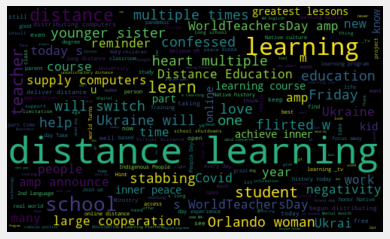

In [6]:
#word cloud
allWords = ''.join([twts for twts in df['Tweet']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 120).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show

In [7]:
#function to compute negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

#computing the value
df['Analysis'] = df['Polarity'].apply(getAnalysis)

#show dataframe
df

,User,Tweet,Subjectivity,Polarity,Analysis
0,jonesytheteachr,"""Disability conversations: The NCCD and distan...",0.000000,0.000000,Neutral
1,EdTechFam,_Logic: Wondering if TeachLogic microphones ca...,0.000000,0.000000,Neutral
2,suptking,: ALL Madison Seniors take the ACT on October ...,0.000000,0.000000,Neutral
3,gorebitchbuggs,this is 100 AA 100 aim window on a (not acc...,0.644444,0.033333,Positive
4,attyjlynchjr,"_tente _ so one year's results, at the concl...",0.700595,0.163095,Positive
...,...,...,...,...,...
2088,MLA_College,MASTER OF BUSINESS ADMINISTRATION\n\nMLA Colle...,0.383333,0.133333,Positive
2089,LukeshRoberts,: Just finished my PhD viva on ‘The role of in...,0.000000,0.000000,Neutral
2090,GeoEdResearch,Why not? Evidence me - why can’t I learn orga...,0.800000,-0.066667,Negative
2091,DucoTraining,: Wondering why you should upskill your staff ...,0.000000,0.000000,Neutral


In [8]:
df.to_csv('C:/Users/casti/Documents/ThesisData/DistanceLearning_Dataset2.csv', index=False) #change csv file name every search

In [9]:
#print all positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j)+')'+sortedDF['Tweet'][i])
        print()
        j = j+1

1)   this is 100 AA 100 aim window on a (not accurate) hitbox, which is what most console players use

it aims for the " rez soul", it's shit at a distance, and you still have to put effort into learning how to hit headshots

if you are losing to that on PC, that's a fat skill issue 

2)_tente  _  so one year's results, at the conclusion of a pandemic where distance learning was necessary is a good barometer for you as to how Mckee would do as Governor?  That is seriously some 3 dimensional chess right there.

3)  Shame on everybody who kept the schools closed! 

Distance Learning was an absolute joke. 

Looking at you 

4)  Learning this at 32. Had to distance myself completely from both of my biological parents. It was the only way I could regain my sanity and finally be true to myself. It hurts, but it motivates me to break the cycle.

5)More detail on our MajorAnnouncement about our 💯 Online program and distance learning options! 

TDLR Changes

International Institute of Aesthetic

― Roy T. Ben…

543): “Learning to distance yourself from all the negativity is one of the greatest lessons to achieve inner peace.”
― Roy T. Ben…

544): “Learning to distance yourself from all the negativity is one of the greatest lessons to achieve inner peace.”
― Roy T. Ben…

545)“Learning to distance yourself from all the negativity is one of the greatest lessons to achieve inner peace.”
― Roy T. Bennett
Sivaangi 

546)They are also working on group communication and speaking up for themselves. I feel like this is related to distance learning, too. It’s taken them awhile to warm up to each other, even.

However, now that they have? They thrive on goofy, silly, debate-based activities.

547)The top benefits of distance learning - Latest Digital Transformation Trends | Cloud News - Wire19 DigitalTransformation  CC: 

548): Hint to the many that believe VR is taking the focus away from the real world:

Turns out, learning a 2nd language is the be…

549)Learning Social Networking A Coun

851): Our brand new MA English programme opens for applications in under 2 weeks time with part time and distance learning opti…

852)._LDN CEO Erin Northey () believes that crises can sharpen decisions for leaders by making priorities clear.

Read about how Sierra Leone schools moving to distance learning reached 1 million children through national radio lessons.

 

853): On today’s WorldTeachersDay,  &amp;   announce a large cooperation to supply 50,000 computers for teachers in Ukrai…

854): Our brand new MA English programme opens for applications in under 2 weeks time with part time and distance learning opti…

855): On today’s WorldTeachersDay,  &amp;   announce a large cooperation to supply 50,000 computers for teachers in Ukrai…

856)O-Cademy By ONPASSIVE❗️
👩🏫👨🎓Let distance and age not be a limitation to your learning or teaching. 
👩🎓👨🏫 Reinvent yourself with the best e-Learning Platform to learn and earn.


ONPASSIVE OFounders earn GoFounders ... 

857)     _Consult         I

In [10]:
#print all negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j)+')'+sortedDF['Tweet'][i])
        print()
        j = j+1

1)Authorities in the Kursk region in Russia bordering Ukraine are recommending 'distance learning' for school students beginning 13-Oct reported by TASS - Unknown reason as of yet.

2):  We need to learn to live with covid. That doesn't mean ignore it and go back to normal. It means learn to live…

3)(Solved): The purpose of the essay is to provide advice for other distance learning students on how to manage time 

4)Wtf?!? 🤬🤬🤬 From one of the books in the course I'm taking on an online/distance learning. Like WTF? 😤 

5) We need to learn to live with covid. That doesn't mean ignore it and go back to normal. It means learn to live with masks, social distancing, sanitising, remote working, distance learning, etc. Other countries manage it so why can't we

6) Last I was getting ready to “pause” HS sports even though 0.1% of Covid deaths were tied to all sporting events. Kids were crying they were going to be forced back into distance learning. Crime was 20% lower. Heating bills 50% less 

45): Distance learning, as pathogens spread via bullshitjobs. Parents got little time due to bullshitjobs. Studying for bul…

46): Distance learning, as pathogens spread via bullshitjobs. Parents got little time due to bullshitjobs. Studying for bul…

47)Join Inspired Classroom and MPG Ranch LIVE from the mountains of Montana!  Students in K-12 are invited to this interactive distance learning event where we dive into the secret world of mountain lions!   

48): Distance learning, as pathogens spread via bullshitjobs. Parents got little time due to bullshitjobs. Studying for bul…

49): Distance learning, as pathogens spread via bullshitjobs. Parents got little time due to bullshitjobs. Studying for bul…

50)but time spent on myself is far from being squandered. time spent learning to distance myself from self-hatred, spent learning to unclench and let myself be truly vulnerable, is time invested in making me the person i am today.

51)My son falls into that category. When his school sh


335): Virtual distance learning was not only a dog during COVID. It was a dead dog. And that's an insult to dogs. Yet here's ye…

336) Once I was in distance learning and I got the notif so I switched the audio output of the class cal to my laptop speakers and turned it al the way down so I could watch the stream in peace

337): Virtual distance learning was not only a dog during COVID. It was a dead dog. And that's an insult to dogs. Yet here's ye…

338)  The area is depopulating. It’s hard to recruit teachers to that area. A lot of schools have to rely on distance learning. They get no help from the state level, and that has been controlled by Republicans for almost 10 years.

339): Virtual distance learning was not only a dog during COVID. It was a dead dog. And that's an insult to dogs. Yet here's ye…

340): Virtual distance learning was not only a dog during COVID. It was a dead dog. And that's an insult to dogs. Yet here's ye…

341): So, you've already done a few OpenLearn cours

In [11]:
#percentage of positive tweets
ptweets = df[df.Analysis=='Positive']
ptweets = ptweets['Tweet']

round((ptweets.shape[0] / df.shape[0])*100, 1)

48.7

In [12]:
#percentage of negative tweets
ptweets = df[df.Analysis=='Negative']
ptweets = ptweets['Tweet']

round((ptweets.shape[0] / df.shape[0])*100, 1)

17.7

<function matplotlib.pyplot.show(close=None, block=None)>

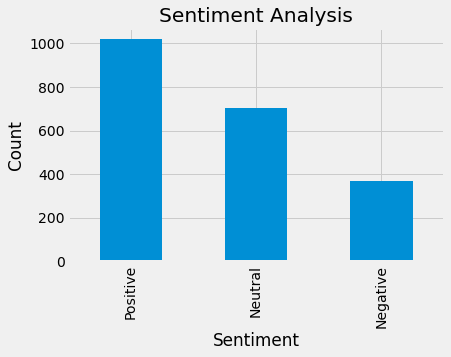

In [13]:
#show the value counts
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind='bar')
plt.show